In [249]:
import pandas as pd
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import xgboost as xgb

In [290]:
df = pd.read_excel('training.xlsx')
df.head(5)

,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2019,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,Statewide,395883
1,2020,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,370954
2,2021,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,349406
3,2019,P,Not Applicable,Gasoline,2019.0,ICE,Not Applicable,≥4,Statewide,348475
4,2019,P,Not Applicable,Gasoline,2018.0,ICE,Not Applicable,≥4,Statewide,333296


## Data Preprocessing

In [291]:
# Region column only has one unique value, so we will drop this column
df = df.drop(columns = ['Region'])

In [292]:
# We are adding a car year column to represent the difference between date and model year
df['Car Year'] = df['Date'] - df['Model Year']
df = df.drop(columns = ['Date'])
df.head(5)

,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Vehicle Population,Car Year
0,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,395883,-1.0
1,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,370954,0.0
2,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,349406,1.0
3,P,Not Applicable,Gasoline,2019.0,ICE,Not Applicable,≥4,348475,0.0
4,P,Not Applicable,Gasoline,2018.0,ICE,Not Applicable,≥4,333296,1.0


In [293]:
# Dropping the ones with unknown fuel type and unknown number of vehicles registered
df = df[df['Fuel Type']!= 'Unknown']
df = df[df['Number of Vehicles Registered at the Same Address']!= 'Unknown']
df.head(5)

,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Vehicle Population,Car Year
0,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,395883,-1.0
1,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,370954,0.0
2,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,349406,1.0
3,P,Not Applicable,Gasoline,2019.0,ICE,Not Applicable,≥4,348475,0.0
4,P,Not Applicable,Gasoline,2018.0,ICE,Not Applicable,≥4,333296,1.0


In [294]:
df.columns

Index(['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year',
       'Fuel Technology', 'Electric Mile Range',
       'Number of Vehicles Registered at the Same Address',
       'Vehicle Population', 'Car Year'],
      dtype='object')

In [295]:
df_cat = df[['Vehicle Category', 'GVWR Class', 'Fuel Type',
             'Fuel Technology', 'Electric Mile Range',
             'Number of Vehicles Registered at the Same Address']]
new_df = pd.get_dummies(df_cat, dtype = float)
# Categorical variables will be converted into dummy variables

In [296]:
new_df['Model Year'] = df['Model Year']
new_df['Car Year'] = df['Car Year']
new_df['Vehicle Population'] = df['Vehicle Population']
new_df.head(5)
# Now new_df contains the categorical variables converted to dummy variables, as well as
# the continuous variables like model year, car year and vehicle population

,Vehicle Category_B,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,Vehicle Category_T1,Vehicle Category_T2,Vehicle Category_T3,Vehicle Category_T4,...,Electric Mile Range_>150 miles,Electric Mile Range_Not Applicable,Electric Mile Range_Unknown,Number of Vehicles Registered at the Same Address_1,Number of Vehicles Registered at the Same Address_2,Number of Vehicles Registered at the Same Address_3,Number of Vehicles Registered at the Same Address_≥4,Model Year,Car Year,Vehicle Population
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2020.0,-1.0,395883
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2020.0,0.0,370954
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2020.0,1.0,349406
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2019.0,0.0,348475
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2018.0,1.0,333296


In [297]:
new_df.shape

(40934, 45)

In [444]:
new_df.columns

Index(['Vehicle Category_B', 'Vehicle Category_BS', 'Vehicle Category_BT',
       'Vehicle Category_MC', 'Vehicle Category_MH', 'Vehicle Category_P',
       'Vehicle Category_T1', 'Vehicle Category_T2', 'Vehicle Category_T3',
       'Vehicle Category_T4', 'Vehicle Category_T5', 'Vehicle Category_T6',
       'Vehicle Category_T7', 'GVWR Class_1', 'GVWR Class_2', 'GVWR Class_3',
       'GVWR Class_4', 'GVWR Class_5', 'GVWR Class_6', 'GVWR Class_7',
       'GVWR Class_8', 'GVWR Class_Not Applicable', 'GVWR Class_Unknown',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_Gasoline',
       'Fuel Type_Hydrogen', 'Fuel Type_Natural Gas', 'Fuel Technology_BEV',
       'Fuel Technology_FCEV', 'Fuel Technology_ICE', 'Fuel Technology_PHEV',
       'Electric Mile Range_0 to 50 miles',
       'Electric Mile Range_101 to 150 miles',
       'Electric Mile Range_51 to 100 miles', 'Electric Mile Range_>150 miles',
       'Electric Mile Range_Not Applicable', 'Electric Mile Range_Unknown',
  

## Scoring Dataset

In [298]:
scoring = pd.read_excel('scoring.xlsx')
scoring = scoring.drop(columns = ['Region'])

scoring['Car Year'] = scoring['Date'] - scoring['Model Year']
scoring = scoring.drop(columns = ['Date'])

In [299]:
scoring_cat = scoring[['Vehicle Category', 'GVWR Class', 'Fuel Type',
             'Fuel Technology', 'Electric Mile Range',
             'Number of Vehicles Registered at the Same Address']]
new_scoring = pd.get_dummies(scoring_cat, dtype = float)

In [443]:
new_scoring.columns

Index(['Vehicle Category_B', 'Vehicle Category_BS', 'Vehicle Category_BT',
       'Vehicle Category_MC', 'Vehicle Category_MH', 'Vehicle Category_P',
       'Vehicle Category_T1', 'Vehicle Category_T2', 'Vehicle Category_T3',
       'Vehicle Category_T4', 'Vehicle Category_T5', 'Vehicle Category_T6',
       'Vehicle Category_T7', 'GVWR Class_1', 'GVWR Class_2', 'GVWR Class_3',
       'GVWR Class_4', 'GVWR Class_5', 'GVWR Class_6', 'GVWR Class_7',
       'GVWR Class_8', 'GVWR Class_Not Applicable', 'GVWR Class_Unknown',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_Gasoline',
       'Fuel Type_Hydrogen', 'Fuel Type_Natural Gas', 'Fuel Technology_BEV',
       'Fuel Technology_FCEV', 'Fuel Technology_ICE', 'Fuel Technology_PHEV',
       'Electric Mile Range_0 to 50 miles',
       'Electric Mile Range_101 to 150 miles',
       'Electric Mile Range_51 to 100 miles', 'Electric Mile Range_>150 miles',
       'Electric Mile Range_Not Applicable', 'Electric Mile Range_Unknown',
  

In [300]:
new_scoring['Model Year'] = scoring['Model Year']
new_scoring['Car Year'] = scoring['Car Year']
new_scoring['Vehicle Population'] = scoring['Vehicle Population']
new_scoring.head(5)

,Vehicle Category_B,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,Vehicle Category_T1,Vehicle Category_T2,Vehicle Category_T3,Vehicle Category_T4,...,Electric Mile Range_>150 miles,Electric Mile Range_Not Applicable,Electric Mile Range_Unknown,Number of Vehicles Registered at the Same Address_1,Number of Vehicles Registered at the Same Address_2,Number of Vehicles Registered at the Same Address_3,Number of Vehicles Registered at the Same Address_≥4,Model Year,Car Year,Vehicle Population
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2020.0,4.0,316065
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2021.0,3.0,315986
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022.0,2.0,306487
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2024.0,0.0,284754
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2023.0,1.0,284153


## Data Splitting

In [301]:
X = new_df.drop(columns=["Vehicle Population"])
y = new_df["Vehicle Population"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Decision Tree

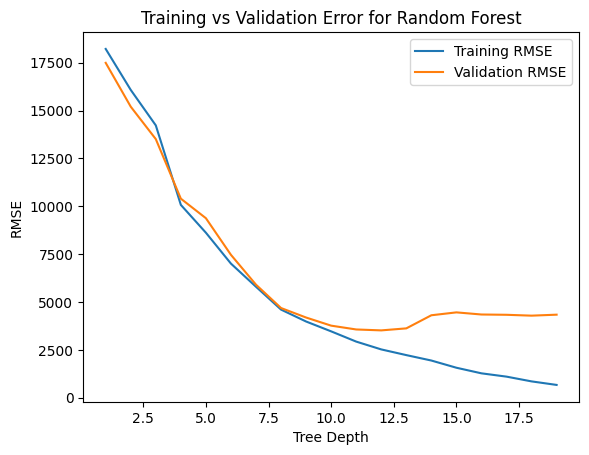

In [457]:
train_error, val_error = [], []
depths = range(1, 20)

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_rmse = np.sqrt(np.mean((model.predict(X_train) - y_train) ** 2))
    val_rmse = np.sqrt(np.mean((model.predict(X_val) - y_val) ** 2))

    train_error.append(train_rmse)
    val_error.append(val_rmse)



plt.plot(depths, train_error, label='Training RMSE')
plt.plot(depths, val_error, label='Validation RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training vs Validation Error for Random Forest')
plt.show()


In [303]:
dt_model = DecisionTreeRegressor(max_depth=12, random_state=0)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 3510.9868


In [304]:
X_scoring = new_scoring.drop(columns=["Vehicle Population"])
y_scoring = new_scoring["Vehicle Population"]
y_pred_dt = dt_model.predict(X_scoring)

np.sqrt(mean_squared_error(y_scoring, y_pred_dt))

4100.354982956451

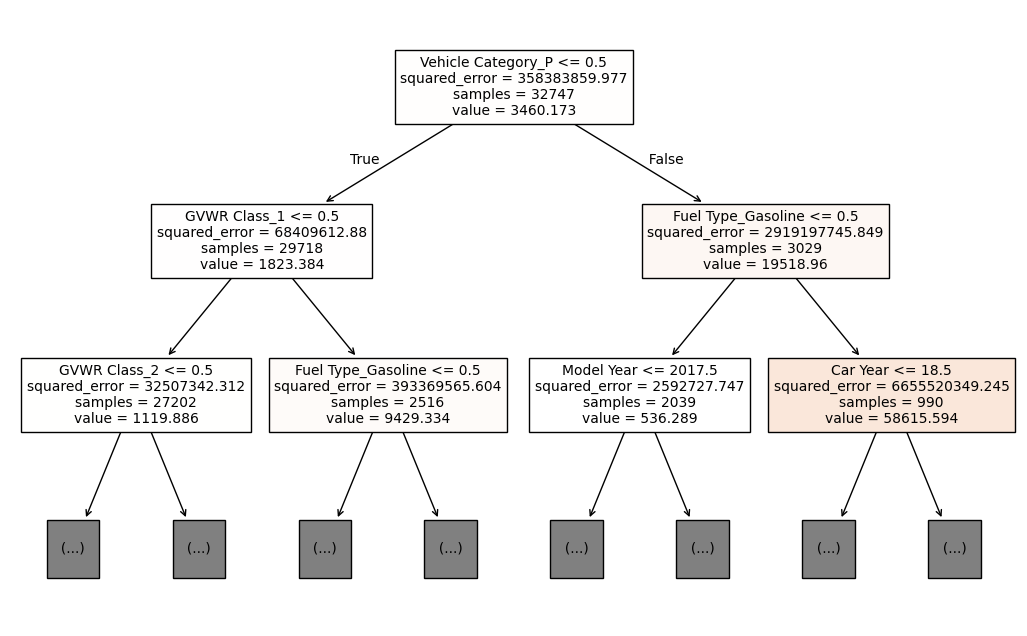

In [454]:
feature_names = [str(name) for name in X_train.columns]
plt.figure(figsize=(13, 8))
plot_tree(dt_model, max_depth=2, filled=True, feature_names=feature_names, fontsize=10)
plt.show()

## XGBoost


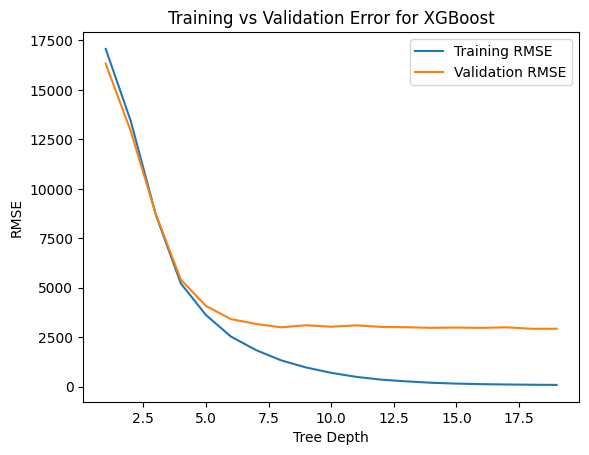

In [456]:
depths = range(1,20)
train_error, val_error = [], []
for depth in depths:
    model = xgb.XGBRegressor(
                  n_estimators=200,
                  learning_rate=0.1,
                  max_depth=depth,
                  subsample=0.8,
                  colsample_bytree=0.8,
                  random_state=0
              )
    model.fit(X_train, y_train)

    train_rmse = np.sqrt(np.mean((model.predict(X_train) - y_train) ** 2))
    val_rmse = np.sqrt(np.mean((model.predict(X_val) - y_val) ** 2))

    train_error.append(train_rmse)
    val_error.append(val_rmse)



plt.plot(depths, train_error, label='Training RMSE')
plt.plot(depths, val_error, label='Validation RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training vs Validation Error for XGBoost')
plt.show()

In [435]:
xgb_model = xgb.XGBRegressor(
    n_estimators=250,
    learning_rate=0.1,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0
)


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 2940.1825


In [436]:
X_scoring = new_scoring.drop(columns=["Vehicle Population"])
y_scoring = new_scoring["Vehicle Population"]
y_pred_xgb = xgb_model.predict(X_scoring)

In [437]:
np.sqrt(mean_squared_error(y_scoring, y_pred_xgb))

3092.3982602504484

In [458]:
from xgboost import plot_tree
import graphviz

dot_data = xgb.to_graphviz(xgb_model, num_trees=0)

dot_data.render("xgboost_tree")

'xgboost_tree.pdf'

In [448]:
pd.DataFrame(y_pred_xgb).to_excel('prediction.xlsx')